In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('medical_cost_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print('-'*50)

sex
male      676
female    662
Name: count, dtype: int64
--------------------------------------------------
smoker
no     1064
yes     274
Name: count, dtype: int64
--------------------------------------------------
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
--------------------------------------------------


<Axes: ylabel='charges'>

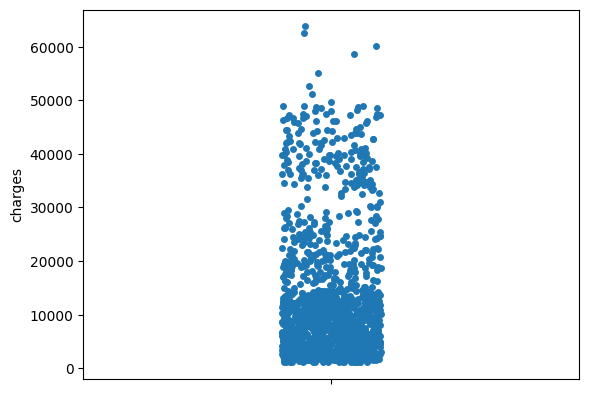

In [8]:
sns.stripplot(df['charges'])

<Axes: ylabel='charges'>

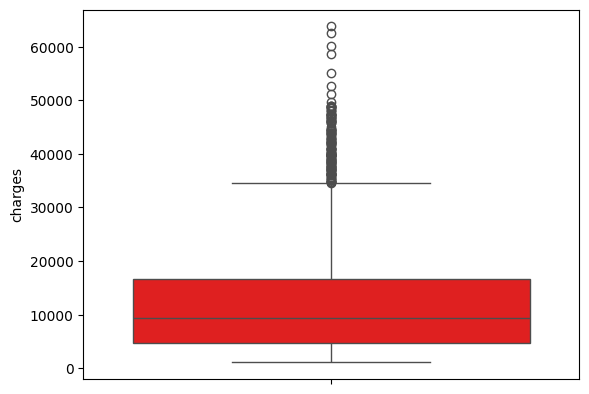

In [9]:

sns.boxplot(df['charges'],color='red',)

<Axes: xlabel='charges', ylabel='Density'>

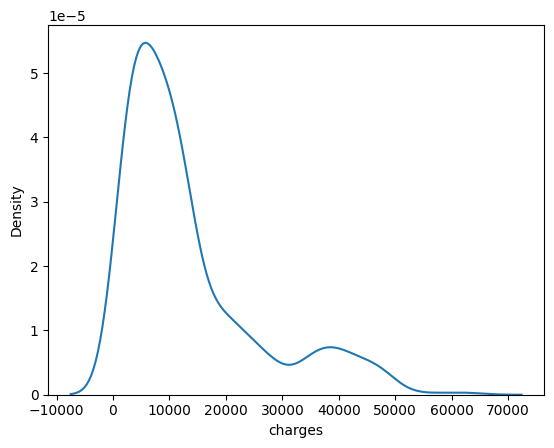

In [10]:
sns.kdeplot(df['charges'])

In [11]:
df[df['sex']=='male']['smoker'].value_counts()

smoker
no     517
yes    159
Name: count, dtype: int64

In [12]:
df[df['sex']=='female']['smoker'].value_counts()

smoker
no     547
yes    115
Name: count, dtype: int64

In [13]:
df[df['sex']=='male']['region'].value_counts()

region
southeast    189
northeast    163
southwest    163
northwest    161
Name: count, dtype: int64

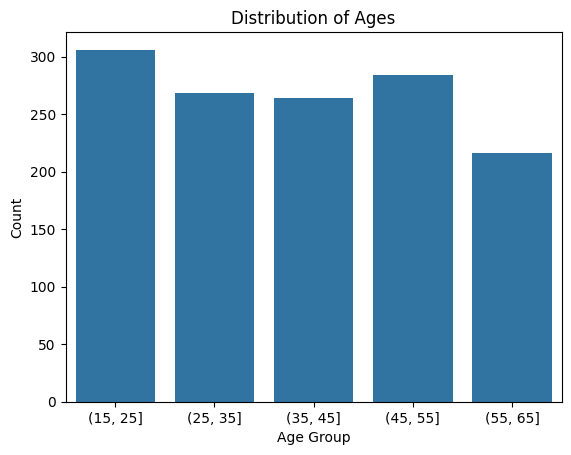

In [14]:
age_bins = [15,25, 35, 45, 55, 65]

sns.countplot(x=pd.cut(df['age'], bins=age_bins))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

In [15]:
df['charges'] = np.log1p(df['charges'])

<Axes: xlabel='charges', ylabel='Count'>

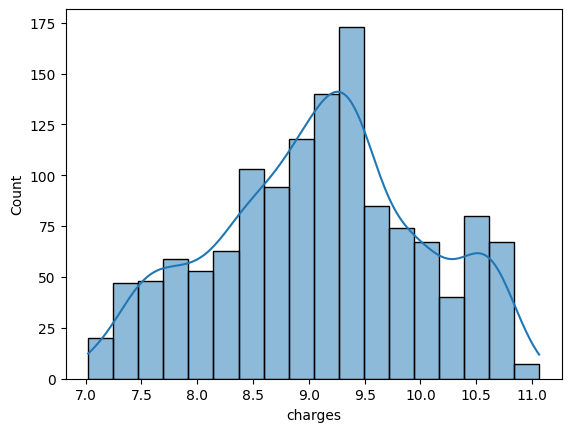

In [16]:
sns.histplot(df['charges'], kde=True)

In [17]:
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

In [18]:
dff = pd.DataFrame()

In [19]:
from sklearn.preprocessing import LabelEncoder

df['region'] = df['region'].map({
                            'northwest': 0,
                            'northeast': 1,
                            'southwest': 2,
                            'southeast': 3})
for col in categorical_features[:-1]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,9.734236
1,18,1,33.770,1,0,3,7.453882
2,28,1,33.000,3,0,3,8.400763
3,33,1,22.705,0,0,0,9.998137
4,32,1,28.880,0,0,0,8.260455


In [20]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
df['bmi'] = np.log1p(df['bmi'])

mm = MinMaxScaler()
rs = RobustScaler()
df['age'] = mm.fit_transform(df[['age']])
df['bmi'] = rs.fit_transform(df[['bmi']])

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,-0.309315,0,1,2,9.734236
1,0.000000,1,0.380079,1,0,3,7.453882
2,0.217391,1,0.296588,3,0,3,8.400763
3,0.326087,1,-1.048077,0,0,0,9.998137
4,0.304348,1,-0.184988,0,0,0,8.260455
...,...,...,...,...,...,...,...
1333,0.695652,1,0.067070,3,0,0,9.268755
1334,0.000000,0,0.176241,0,0,1,7.699381
1335,0.000000,0,0.696513,0,0,3,7.396847
1336,0.065217,0,-0.590568,0,0,2,7.605365


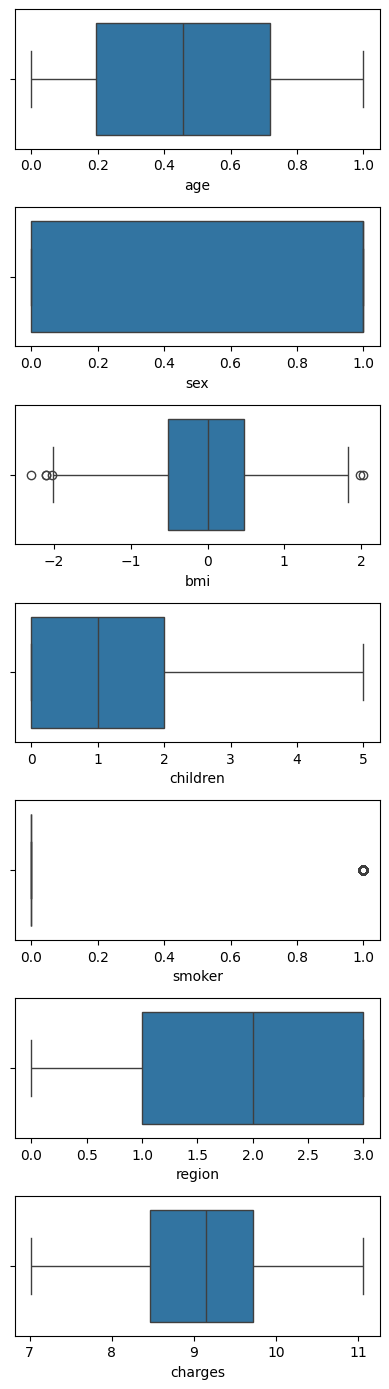

In [22]:
num_cols = df.select_dtypes(np.number).columns
fig,ax = plt.subplots(7,1,figsize=(4,14))
for i,col in enumerate(num_cols):
    sns.boxplot(x=col,data=df,ax=ax[i])
plt.tight_layout()

In [23]:
df

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,-0.309315,0,1,2,9.734236
1,0.000000,1,0.380079,1,0,3,7.453882
2,0.217391,1,0.296588,3,0,3,8.400763
3,0.326087,1,-1.048077,0,0,0,9.998137
4,0.304348,1,-0.184988,0,0,0,8.260455
...,...,...,...,...,...,...,...
1333,0.695652,1,0.067070,3,0,0,9.268755
1334,0.000000,0,0.176241,0,0,1,7.699381
1335,0.000000,0,0.696513,0,0,3,7.396847
1336,0.065217,0,-0.590568,0,0,2,7.605365


In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df.drop(columns='charges')
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": make_pipeline(StandardScaler(), SVR()),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(random_state=42)

}

In [26]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='r2', cv=kfold)
    print(f"{name} -> Avg RMSE: {np.mean(scores):.2f}, Fold-wise: {scores}")

Linear Regression -> Avg RMSE: 0.76, Fold-wise: [0.80235015 0.73742946 0.80018083 0.70909833 0.76499341]
Ridge Regression -> Avg RMSE: 0.76, Fold-wise: [0.8019495  0.73719905 0.8004474  0.7093245  0.76494357]
Lasso Regression -> Avg RMSE: 0.76, Fold-wise: [0.79561717 0.73346818 0.80033316 0.70781186 0.76216588]
Decision Tree -> Avg RMSE: 0.71, Fold-wise: [0.8058909  0.69034585 0.6365895  0.68984025 0.73676755]
Random Forest -> Avg RMSE: 0.81, Fold-wise: [0.8500359  0.7997505  0.81319089 0.80182405 0.80500876]
Gradient Boosting -> Avg RMSE: 0.83, Fold-wise: [0.86618269 0.82682516 0.84615865 0.80671555 0.81906304]
SVR -> Avg RMSE: 0.83, Fold-wise: [0.86181895 0.81898968 0.8569819  0.8047032  0.81633106]
KNN -> Avg RMSE: 0.71, Fold-wise: [0.71418634 0.70511336 0.71484346 0.69132842 0.74245315]
XGBoost -> Avg RMSE: 0.78, Fold-wise: [0.8125182  0.7654919  0.76271868 0.76476145 0.78564592]


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['rbf', 'linear', 'poly'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto'],
    'svr__epsilon': [0.05,0.1, 0.2, 0.5, 1]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'svr__C': 1, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Best R² Score: 0.8271493726722099


In [28]:
param_grid = {
    'svr__kernel': ['rbf'],
    'svr__C': [3,4,5],
    'svr__gamma': ['scale'],
    'svr__epsilon': [0.1,0.11,0.12,0.13]
}
#modified and finalised parameters

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'svr__C': 4, 'svr__epsilon': 0.12, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Best R² Score: 0.8353205668078155


In [29]:
grid_search.best_params_

{'svr__C': 4,
 'svr__epsilon': 0.12,
 'svr__gamma': 'scale',
 'svr__kernel': 'rbf'}

In [30]:
svr = SVR(kernel='rbf',C=3,epsilon=0.12,gamma='scale')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

0.14382693156107051

In [32]:
np.sqrt(mean_squared_error(y_pred,y_test))

np.float64(0.37924521297054037)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.8098820348075458

In [39]:
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['poisson','absolute_error','friedman_mse', 'squared_error']
}

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
grid_search = RandomizedSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None, 'criterion': 'friedman_mse', 'bootstrap': True}
Best R² Score: 0.8291258216002146


In [43]:
param_grid = {
    'n_estimators': [53,54,55],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [4],
    'max_features': [None],
    'bootstrap': [True],
    'criterion': ['friedman_mse']
}

from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 53}
Best R² Score: 0.8300856992487684


In [ ]:
'we will use SVR'